In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)


In [2]:
X,Y = load_coffee_data()
print(X.shape, Y.shape)

(200, 2) (200, 1)


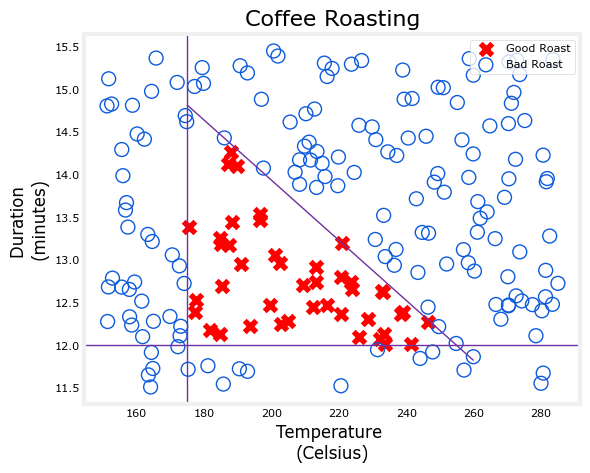

In [3]:
plt_roast(X,Y)

In [4]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)  # learns mean, variance
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f}, {np.min(Xn[:,0]):0.2f}")
print(f"Duration    Max, Min post normalization: {np.max(Xn[:,1]):0.2f}, {np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51
Temperature Max, Min post normalization: 1.66, -1.69
Duration    Max, Min post normalization: 1.79, -1.70


In [5]:
Xt = np.tile(Xn,(1000,1))
Yt= np.tile(Y,(1000,1))
print(Xt.shape, Yt.shape)

(200000, 2) (200000, 1)


In [6]:
tf.random.set_seed(1234)  # applied to achieve consistent results
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(3, activation='sigmoid', name = 'layer1', input_shape=(2,)),
        tf.keras.layers.Dense(1, activation='sigmoid', name = 'layer2'),
     ]
)

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [8]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[-0.83  0.3  -0.99]
 [-0.58 -0.18  0.05]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[ 0.75]
 [ 0.82]
 [-0.14]] 
b2(1,): [0.]


In [9]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt,Yt,
    epochs=10,
)

Epoch 1/10
6250/6250 [==============================] - 3s 453us/step - loss: 0.1923
Epoch 2/10
6250/6250 [==============================] - 3s 432us/step - loss: 0.1174
Epoch 3/10
6250/6250 [==============================] - 3s 429us/step - loss: 0.0638
Epoch 4/10
6250/6250 [==============================] - 3s 428us/step - loss: 0.0178
Epoch 5/10
6250/6250 [==============================] - 3s 433us/step - loss: 0.0108
Epoch 6/10
6250/6250 [==============================] - 3s 433us/step - loss: 0.0073
Epoch 7/10
6250/6250 [==============================] - 3s 432us/step - loss: 0.0051
Epoch 8/10
6250/6250 [==============================] - 3s 433us/step - loss: 0.0035
Epoch 9/10
6250/6250 [==============================] - 3s 432us/step - loss: 0.0025
Epoch 10/10
6250/6250 [==============================] - 3s 430us/step - loss: 0.0018


In [10]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[  0.17 -11.04  14.67]
 [ 10.37  -0.3   12.16]] 
b1: [ 12.51 -11.87   2.  ]
W2:
 [[ 43.69]
 [-53.38]
 [-45.59]] 
b2: [-13.59]


In [11]:
X_test = np.array([
    [200,13.9],  # postive example
    [200,17]])   # negative example
X_testn = norm_l(X_test)
predictions = model.predict(X_testn)
print("predictions = \n", predictions)

1/1 [==============================] - 0s 35ms/step
predictions = 
 [[9.93e-01]
 [1.82e-07]]


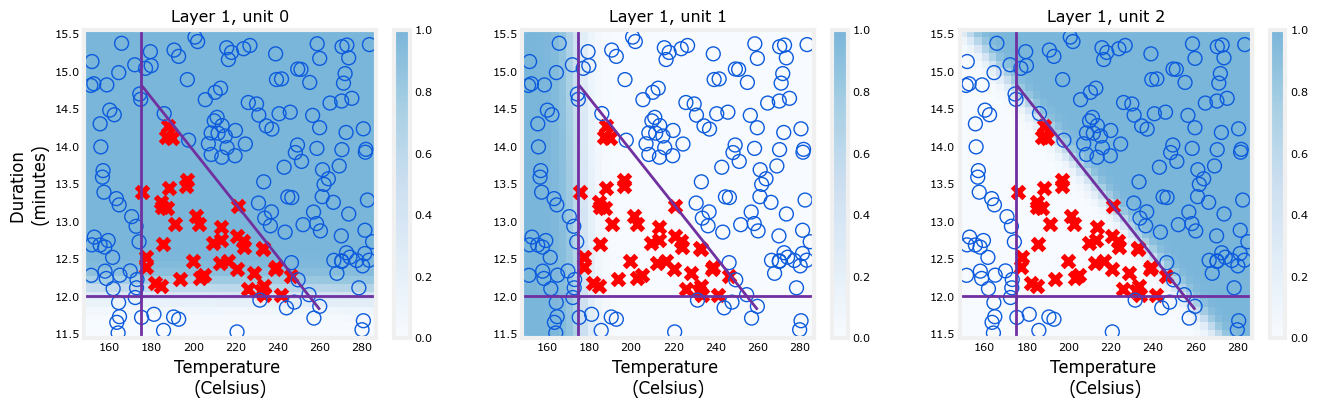

In [12]:
plt_layer(X,Y.reshape(-1,),W1,b1,norm_l)

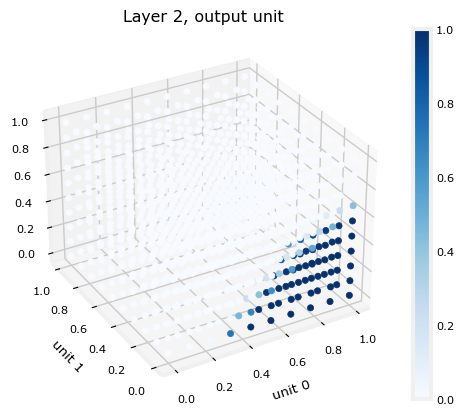

In [13]:
plt_output_unit(W2,b2)

7/7 [==============================] - 0s 500us/step


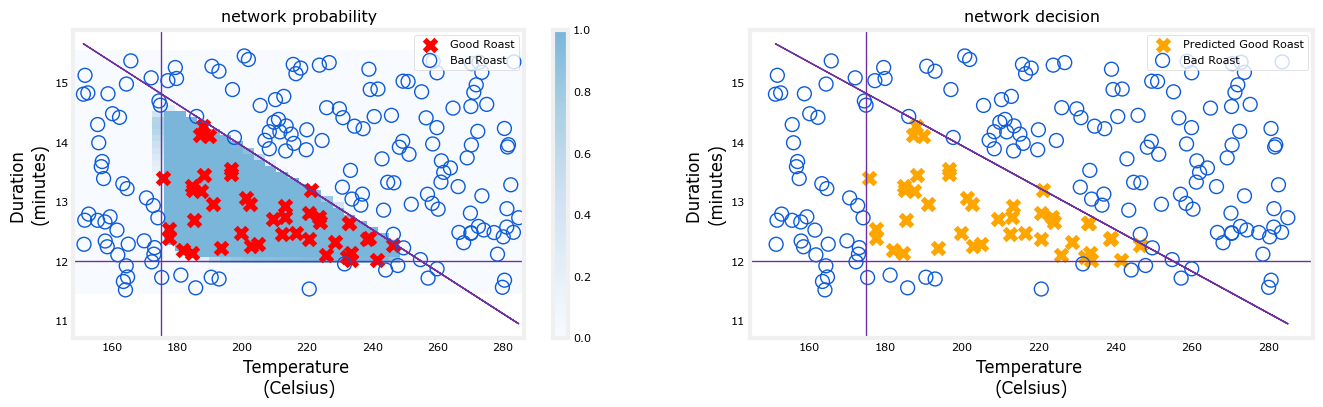

In [14]:
netf= lambda x : model.predict(norm_l(x))
plt_network(X,Y,netf)